<a href="https://colab.research.google.com/github/juandesages/PDI.Entregas/blob/main/Tpn4/TPn4_Desages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Práctico TP4 (Histograma de Luminancias)

Para este TP se desea que implementen lo siguiente:

*   Generar una función que como parámetro de entrada tome la luminacia de una 
imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.
*  
Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.

*  Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen


NO OLVIDEN TENER EN CUENTA LOS RANGOS DE CADA ESPACIO DE COLOR RGB Y YIQ.

Recuerden que el Histograma debe ser desarrollado mediante una función desarrollada por ustedes, NO mediante librerías incluyendo numpy.histogram(). Debe tener como parámetros de entrada la luminancia de la imagen y número de bins deseado (opcional el rango) y cómo salidas las cuentas del histograma y el vector rango correspondiente, igual que como lo hace numpy.histogram().
La gráfica debe plotearse a partir de estos parámetros de salida.

In [64]:
import imageio
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#--------- TPN 1 ---------
#Cargar imagen
def load_image(filename):
    im_in=np.clip(imageio.imread(filename),0,255).astype(np.float)/255. 
    #imagen normalizada
    im=np.zeros((*im_in.shape[:2],3))
    image_type = 'RGB'
    if len(im_in.shape)==2: # la imagen es de tipo grayscale
        for i in range (3):
            im[:,:,i]=im_in
            image_type = 'grayscale'
    elif (im_in.shape[2]==4):
        im=im_in[:,:,:3]
        image_type = 'RGBA'
    elif im_in.shape==im.shape:
        im=im_in
    return im, image_type

#obtener información de la imagen
def get_data(im, im_type):
  if im_type == 'grayscale':
    h,w, ch = im.shape
    ch = 1
  else:
    h,w, ch = im.shape
  return h,w,ch #height, wide, channels

#guardar imagen
def save_image(im, title):
  im = im*255
  imageio.imwrite(title,im.astype(np.uint8))
  return 

#graficar imagen (mostrar imagen)
def show_image(im, title):
  plt.imshow(im)
  plt.title(title)
  plt.show()
  return 
# Para las siguientes funciones considero que la imagen es RGB, en los casos de escala de grises se "pasaron" a RGB en la funcion cargar imagen
#obtener dato de un pixel
def pixel_data(im, y, x):
  [R,G,B] = im[y,x,:]*255
  return [R,G,B]

#modificar dato de un pixel
def pixel_set(im, y, x, R,G,B):
  im[y,x,0] = R
  im[y,x,1] = G
  im[y,x,2] = B
  return
#--------- TPN 2 ---------
#matriz para transformar de RGB a YIQ
MAT_YIQ = np.array([[0.299, 0.595716, 0.211456],
                    [0.587, -0.274453, -0.522591],
                    [0.114, -0.321263, 0.311135]])
#funcion para pasar una imagen RGB a YIQ
def rgb2yiq(_im):
    _yiq = np.matmul(_im.reshape((-1,3)), MAT_YIQ).reshape(_im.shape)
    return _yiq
#funcion para modificar valores de Y y de IQ
def scale_yiq(_yiq, alpha, beta):
    _yiq[:, :, 0] *= alpha
    _yiq[:, :, 1:3] *= beta   
    return _yiq
#funcion para pasar la imagen de YIQ a RGB
def yiq2rgb(_yiq):
    _rgb = np.matmul(_yiq.reshape((-1,3)),np.linalg.inv(MAT_YIQ)).reshape(_yiq.shape)
    return _rgb
def clip_yiq(yiq):
  return np.clip(yiq, a_min=[0,-0.5957, -0.5226], a_max=[1, 0.5957, 0.5226])
#--------- TPN 3 ---------
#función para recortar las imagenes para que tengan las mismas dimensiones
def image_clip(im_1, im_2):
  size1 = im_1.shape
  size2 = im_2.shape
  clip1 = np.zeros(size1)
  clip2 = np.zeros(size2)
  if size1[0] > size2[0]:
    clip1 = im_1[50:size2[0], :, :]
    clip2 = im_2[50:size2[0], :, :] 
  if size2[0] > size1[0]:
    clip1 = im_1[50:size1[0], :, :]
    clip2 = im_2[50:size1[0], :, :]  
  if size1[0] == size2[0]:
    clip1 = im_1[50:size1[0], :, :]
    clip2 = im_2[50:size1[0], :, :] 
  if size1[1] > size2[1]:
    clip1 = clip1[:, 50:size2[1], :]
    clip2 = clip2[:, 50:size2[1], :] 
  if size2[1] > size1[1]:
    clip1 = clip1[:, 50:size1[1], :]
    clip2 = clip2[:, 50:size1[1], :]  
  
  if size1[1] == size2[1]:
    clip1 = clip1[:, 50:size1[1], :]
    clip2 = clip2[:, 50:size1[1], :]  
  return clip1, clip2

def padding(im1, im2):
  f1,c1, _ = im1.shape
  f2,c2, _ = im2.shape
  if f1>f2: fmax = f1
  else: fmax = f2
  if c1>c2: cmax = c1
  else: cmax = c2
  im1_new = np.zeros((fmax,cmax,3), dtype='float')
  im2_new = np.copy(im1_new)
  im1_new[:f1,:c1,:] = im1[:,:,:]
  im2_new[:f2,:c2,:] = im2[:,:,:]
  return im1_new, im2_new

#función para realizar la suma y diferencia en espacio RGB
def sum_rgb(im1, im2):
    res = (im1 + im2) / 2 #suma promediada
    return res
def sum_rgb_clamp(im1, im2):

    return
def diff_rgb(im1, im2):
    res = (im1 - im2 + 1) / 2 #resta promediada
    return res

def diff_rgb_clamp(im1, im2):
    
   
    return 
#función para realizar la suma y resta en espacio YIQ
def sum_yiq(im1, im2):
    im1 = rgb2yiq(im1)
    im2 = rgb2yiq(im2)
    w_1 = np.abs(im1[...,0])[:,:,np.newaxis]
    w_2 = np.abs(im2[..., 0])[:,:,np.newaxis]
    ret = im1 + im2
    ret[...,1:] = 2 * (w_1 * im1[..., 1:]+w_2*im2[..., 1:])/(w_1 + w_2)
    return np.clip( yiq2rgb(ret) / 2, 0, 1)

def sum_yiq_clamp(im1, im2):
    im1 = rgb2yiq(im1)
    im2 = rgb2yiq(im2)
    ret = np.zeros(im1.shape)
    y = im1[0]+im2[0]
    i = (im1[0]*im1[1]+im2[0]*im2[1])/y
    q = (im1[0]*im1[2]+im2[0]*im2[2])/y
    res = [y, i ,q]
    return np.clip( yiq2rgb(ret), 0, 1)
 
 
def diff_yiq(im1, im2):
    im1 = rgb2yiq(im1)
    im2 = rgb2yiq(im2)
    w_1 = np.abs(im1[...,0])[:,:,np.newaxis]
    w_2 = np.abs(im2[..., 0])[:,:,np.newaxis]
    ret = im1 - im2
    ret[...,1:] = 2 * (w_1 * im1[..., 1:]+w_2*im2[..., 1:])/(w_1 + w_2)
    return np.clip((yiq2rgb(ret) + 1) / 2, 0, 1)

def diff_yiq_clamp(im1, im2):
    im1 = rgb2yiq(im1)
    im2 = rgb2yiq(im2)
    ret = np.zeros(im1.shape)
    y = im1[0]-im2[0]
    i = (im1[0]*im1[1]-im2[0]*im2[1])/(im1[0]+im2[0])
    q = (im1[0]*im1[2]-im2[0]*im2[2])/(im1[0]+im2[0])
    res = [y, i ,q]
    return np.clip( yiq2rgb(ret), 0, 1)
 

#funciones if lighter/ ifdarker
def if_darker(im_1, im_2):
    sel = (rgb2yiq(im_1)[..., 0] < rgb2yiq(im_2)[..., 0])[..., np.newaxis]
    ret = im_1 * sel + im_2 * (1 - sel)
    return ret

def if_lighter(im_1, im_2):
    return -if_darker(-im_1, -im_2)

#--------- TPN 4  ---------
def histogram(im,bins = 10, range = None):
    if range is None:
        range = (im.min(), im.max())
    im_norm = (im-range[0]) / (range[1] - range[0]) * bins
    indices = np.clip(im_norm, 0, bins - 1).astype(np.int).reshape(-1)
    counts = np.zeros(bins)
    for idx in indices:
        counts[idx] += 1    
    borders = np.linspace(range[0], range[1], bins+1)
    return counts, borders

def hist_and_plot(im, title, bins):
    if im.ndim==2:
        counts, borders = histogram(im, bins = bins, range = (0,1))
    else:
        counts, borders = histogram(rgb2yiq(im)[...,0], bins = bins, range = (0,1))
    fig1 = plt.subplot(1,2,1)
    fig1.plot((borders[1:]+borders[:-1])/2, counts)
    fig2 = plt.subplot(1,2,2)
    if im.ndim==2:
        fig2.imshow(im, 'gray')
    else:
        fig2.imshow(im)    
    plt.title(title)
    plt.show()


def power_change_luminance(im, alpha = 0):
    yiq = rgb2yiq(im)
    yiq[..., 0] **= (2**(-alpha))
    ret = np.clip(yiq2rgb(yiq), 0, 1)
    return ret

def normalize_y(im):
    yiq = rgb2yiq(im)
    yiq[..., 0] = (yiq[..., 0] - np.min(yiq[...,0])) / (np.max(yiq[...,0])- np.min(yiq[...,0]))
    ret = np.clip(yiq2rgb(yiq), 0, 1)
    return ret

def normalize_hist(im):
    idx = np.argsort(im.reshape(-1))
    normalized = np.zeros(idx.shape)
    normalized[idx] = np.linspace(0, 1, len(idx))
    normalized = normalized.reshape(im.shape)
    return normalized

def plot_color_hist(im_col, bins=50,lims=(0, 1)):
    countsR, borders = histogram(im_col[...,0],bins,lims)
    countsG, borders = histogram(im_col[...,1],bins,lims)
    countsB, borders = np.histogram(im_col[...,2],bins,lims)
    countsY, borders = histogram(rgb2yiq(im_col)[...,0],bins,lims)
    plt.plot((borders[1:]+borders[:-1])/2, countsR,color='r',label='red')
    plt.plot((borders[1:]+borders[:-1])/2, countsG,color='g',label='green')
    plt.plot((borders[1:]+borders[:-1])/2, countsB,color='b',label='blue')
    plt.plot((borders[1:]+borders[:-1])/2, countsY,color='black',label='luminance')
    plt.legend()
    

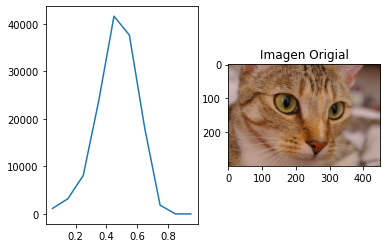

In [54]:
#@title _Cargar imagen_ seleccione la imagen a la que desea obtener el histograma y los bins del histograma

imagen = 'imageio:chelsea.png' #@param ['imageio:astronaut.png','imageio:camera.png','imageio:checkerboard.png', 'imageio:chelsea.png', 'imageio:coffee.png','imageio:wikkie.png']
bins = 10 #@param {type:"slider", min:0, max:100, step:10}
im, im_type = load_image(imagen)
hist_and_plot(im, 'Imagen Origial', bins)



Podemos ver que a medida que aumentamos el valor de la variable bins (contadores) el histograma presenta mas picos y se puede apreciar mejor al información presentada. Con 10 bins se pueden apreciar 3 maximos principales (hay un total de 10 muestras o divisiones) pero al ir aumentando esta variable los picos se encuentran aproximadamente en los mismos puntos pero se pueden apreciar más puntos intermedios. al acercarnos a 100 puntos podemos apreciar muchos mas picos (aunque los picos más altos siguen siendo los mismos 3, solo que quedan más finos)


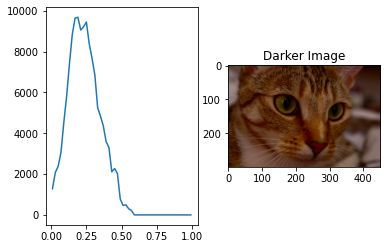

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


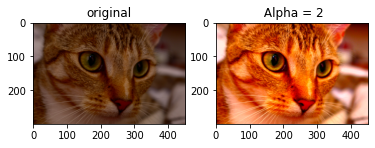

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


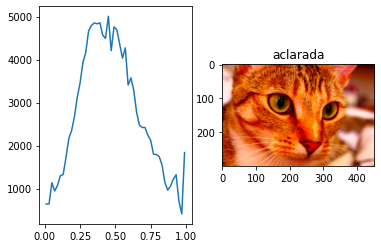

<Figure size 432x288 with 0 Axes>

In [73]:
darker = power_change_luminance(im, alpha = -1)
hist_and_plot(darker, 'Darker Image', 50)
plt.savefig('Imagen Oscurecida.png')
plt.show()


alfa = 2 #@param {type:"slider", min:0, max:5, step:0.1}
im_yiq = scale_yiq(rgb2yiq(darker), alfa, beta)

im_rec = yiq2rgb(clip_yiq(im_yiq))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(darker)
ax[0].set_title('original')
ax[1].imshow(im_rec)
ax[1].set_title(' Alpha = ' +str(alfa))
plt.show()
hist_and_plot(im_rec, 'aclarada', 50)
plt.savefig('Imagen corregida (aclarada) alfa ='+str(alfa)+'.png')
plt.show()

Podemos ver que si tenemos una imagen muy oscura brillante si variamos el parámetro de luminancia no corregimos el problema de manera aceptable

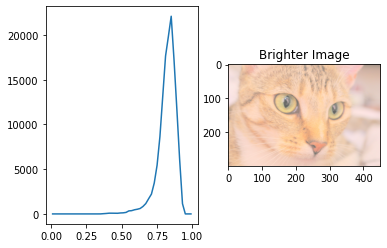

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


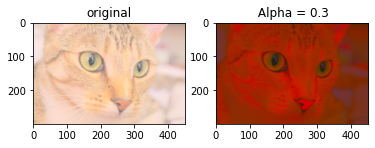

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


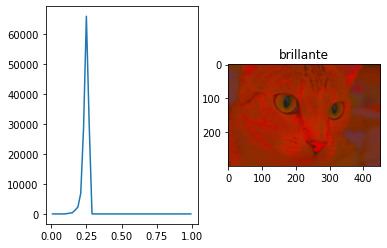

<Figure size 432x288 with 0 Axes>

In [81]:
brighter = power_change_luminance(im, alpha = 2)
hist_and_plot(brighter, 'Brighter Image', 50)
plt.savefig('Imagen brillante.png')
plt.show()

alfa = 0.3 #@param {type:"slider", min:0, max:5, step:0.1}
im_yiq = scale_yiq(rgb2yiq(brighter), alfa, beta)

im_rec = yiq2rgb(clip_yiq(im_yiq))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(lighter)
ax[0].set_title('original')
ax[1].imshow(im_rec)
ax[1].set_title(' Alpha = ' +str(alfa))
plt.show()
hist_and_plot(im_rec, 'brillante', 50)
plt.savefig('Imagen corregida (oscurecida) alfa ='+str(alfa)+'.png')
plt.show()

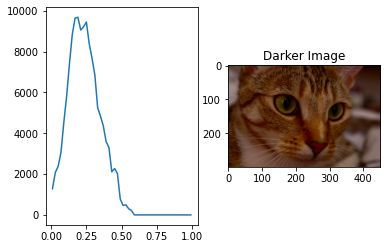

<Figure size 432x288 with 0 Axes>

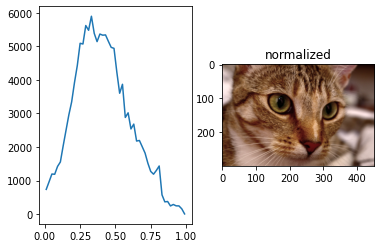

<Figure size 432x288 with 0 Axes>

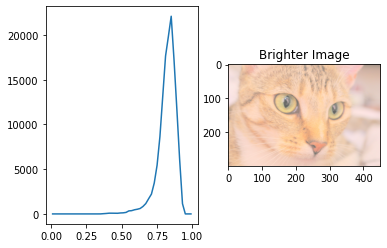

<Figure size 432x288 with 0 Axes>

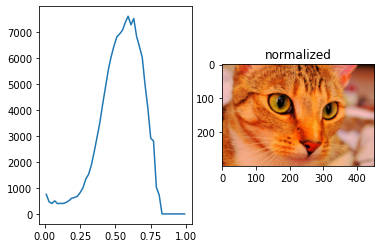

<Figure size 432x288 with 0 Axes>

In [83]:
darker = power_change_luminance(im, alpha = -1)
hist_and_plot(darker, 'Darker Image', 50)
plt.savefig('Imagen Oscurecida.png')
plt.show()
hist_and_plot(normalize_y(darker), 'normalized', 50)
plt.savefig('Imagen normalizada.png')
plt.show()

brighter = power_change_luminance(im, alpha = 2)
hist_and_plot(brighter, 'Brighter Image', 50)
plt.savefig('Imagen brillosa.png')
plt.show()
hist_and_plot(normalize_hist(lighter), 'normalized', 50)
plt.savefig('Imagen normalizada (2).png')
plt.show()

podemos concluir que  aplicando las funciones mencionadas podemos corregir imágenes muy brillantes o muy oscuras, obteniendo resultados bastante cercanos al ideal, tambien podemos ver que el histograma se "corrige"mejor que si solo variamos el valor de alfa